In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pb = pd.read_csv("C:\\Users\\User\\Downloads\\drive-download-20250204T081541Z-001\\purchase_behaviour.csv")
td = pd.read_csv("C:\\Users\\User\\Downloads\\drive-download-20250204T081541Z-001\\transaction_data.csv")

In [5]:
pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
pb.info()
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
me

In [10]:
merged_df = pd.merge(td, pb) #merging both datasets
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [12]:
top3_prods = (merged_df.groupby('PROD_NAME')['TOT_SALES']
              .sum().sort_values(ascending=False).head(3))

print(top3_prods) #Top 3 products sold

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


In [15]:
cust_lyl = (merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).size()
            .reset_index(name = "Transcation_Count"))

top_cust_segs = (cust_lyl.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['Transcation_Count'].sum()
                 .sort_values(ascending = False).head(3))

In [16]:
print(top_cust_segs)

LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              23160
RETIREES               Mainstream          21466
YOUNG SINGLES/COUPLES  Mainstream          20854
Name: Transcation_Count, dtype: int64


# Few visualizations to support my findings

In [20]:
sns.set_theme(style = "whitegrid")

1) Top 3 most profitable products

C:\Users\User\AppData\Local\Temp\ipykernel_17132\269169180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top3_prods.values,


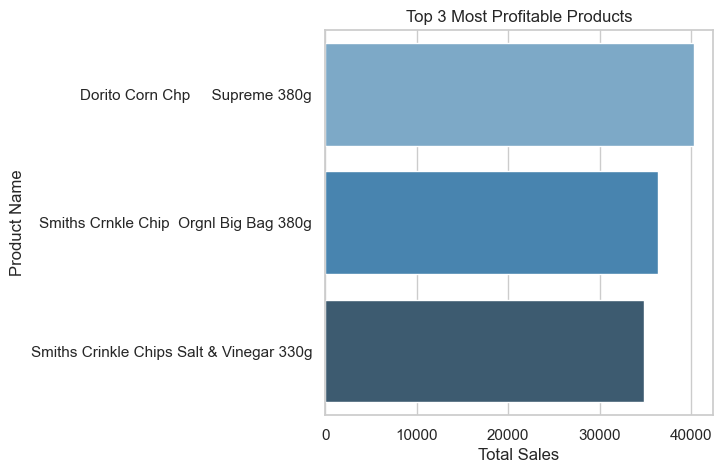

In [23]:
plt.figure(figsize = (5,5))
sns.barplot(x = top3_prods.values,
             y = top3_prods.index,
             palette = 'Blues_d')
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

2) Transaction counts for most loyal customer segements

C:\Users\User\AppData\Local\Temp\ipykernel_17132\4211588224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_cust_segs.values,


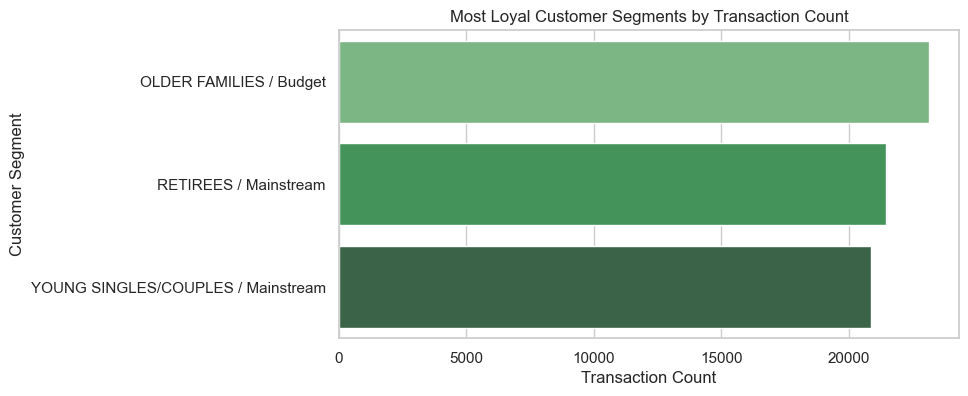

In [25]:
plt.figure(figsize = (8, 4))
sns.barplot(x = top_cust_segs.values,
            y = [" / ".join(seg) for seg in top_cust_segs.index],
            palette = 'Greens_d')
plt.title("Most Loyal Customer Segments by Transaction Count")
plt.xlabel("Transaction Count")
plt.ylabel("Customer Segment")
plt.show()

3) Sales distribution across life stages and spending categories

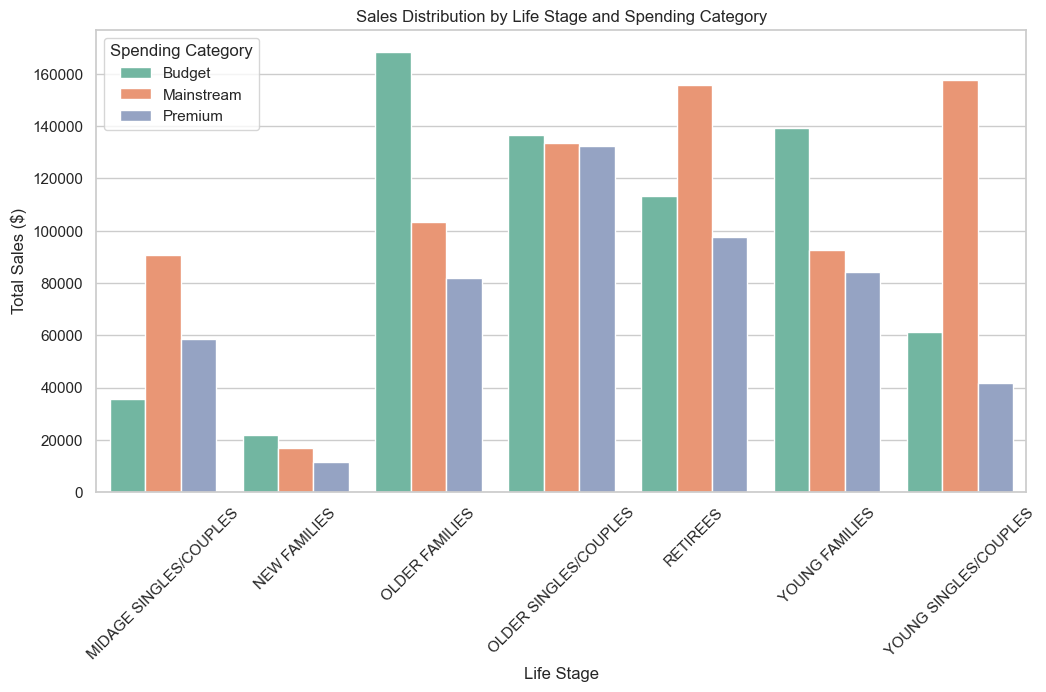

In [26]:
sales_lifestage_spending = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data =sales_lifestage_spending,
    x="LIFESTAGE",
    y="TOT_SALES",
    hue="PREMIUM_CUSTOMER",
    palette="Set2"
)
plt.title("Sales Distribution by Life Stage and Spending Category")
plt.xlabel("Life Stage")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.legend(title="Spending Category")
plt.show()